/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/sta

KeyboardInterrupt: 

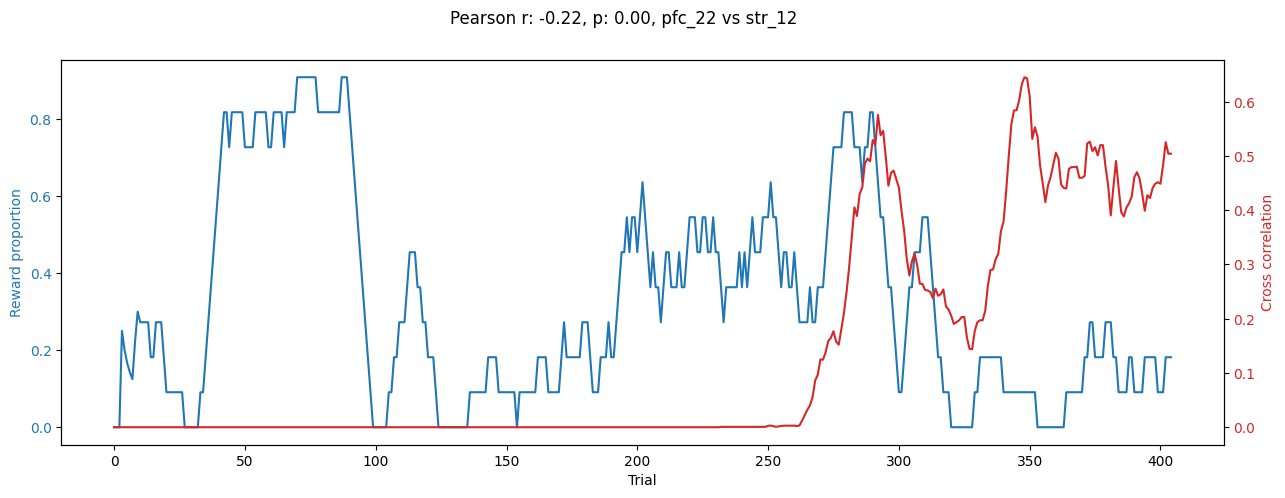

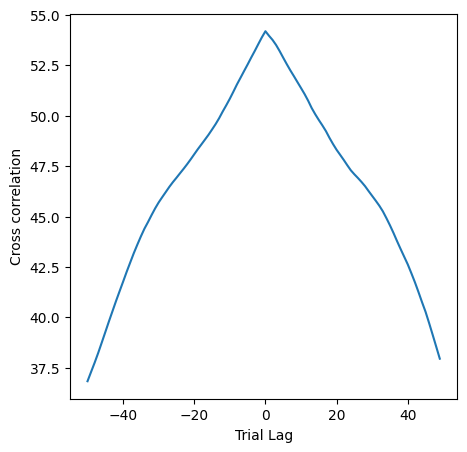

In [2]:
# creating panel C of figure 6
from lib.figure_6 import figure_6_panel_cd
from os.path import join as pjoin
from glob import glob
from lib.file_utils import get_session_names, get_str_pfc

import pandas as pd

# get all the session names
session_names = get_session_names()

# get the pfc and str data
for session_name in session_names:
    session_data_path = pjoin('data', 'behaviour_data', session_name+'.csv')
    session_data = pd.read_csv(session_data_path)
    session_data.fillna(0, inplace=True)
    cue_times = session_data['cue_time'].values
    trial_reward = session_data['trial_reward'].values

    str_times, pfc_times = get_str_pfc(session_name)
    str_cells = list(str_times.keys())
    pfc_cells = list(pfc_times.keys())

    for str_cell in str_cells:
        for pfc_cell in pfc_cells:
            figure_6_panel_cd(str_times=str_times[str_cell], pfc_times=pfc_times[pfc_cell], cue_times=cue_times, rewarded=trial_reward, str_name=str_cell, pfc_name=pfc_cell, session_name=session_name)

In [3]:
# creating panel C of figure 6 using mono pairs
from lib.figure_6 import figure_6_panel_c
from os.path import join as pjoin
from glob import glob
from lib.file_utils import get_session_names, get_str_pfc
from lib.conversion import one_to_zero_cell

import tqdm
import pandas as pd
import numpy as np

# get all mono pairs
mono_pairs = pd.read_csv('mono_pairs.csv')

# plot figure 6 for each pair
# add a progress bar
pairs = mono_pairs.iterrows()


for i, row in tqdm.tqdm(pairs):
    session_name = str(row['mouse']) +  str(row['date'])
    session_data_path = pjoin('data', 'behaviour_data', session_name+'.csv')
    session_data = pd.read_csv(session_data_path)
    session_data.fillna(0, inplace=True)
    cue_times = session_data['cue_time'].values
    trial_reward = session_data['trial_reward'].values

    str_name = row['str_name']
    pfc_name = row['pfc_name']

    # change index from 1 based to 0 based
    str_name = one_to_zero_cell(str_name)
    pfc_name = one_to_zero_cell(pfc_name)

    str_times, pfc_times = np.load(pjoin('data', 'spike_times', session_name, str_name+'.npy')), np.load(pjoin('data', 'spike_times', session_name, pfc_name+'.npy'))
    figure_6_panel_c(str_times=str_times, pfc_times=pfc_times, cue_times=cue_times, rewarded=trial_reward, str_name=str_name, pfc_name=pfc_name, session_name=session_name, mono=True)

27it [00:09,  3.51it/s]/home/peiheng/anaconda3/envs/dissertation/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
28it [00:09,  3.61it/s]/home/peiheng/anaconda3/envs/dissertation/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
182it [00:54,  3.32it/s]


  0%|          | 0/29 [00:00<?, ?it/s]

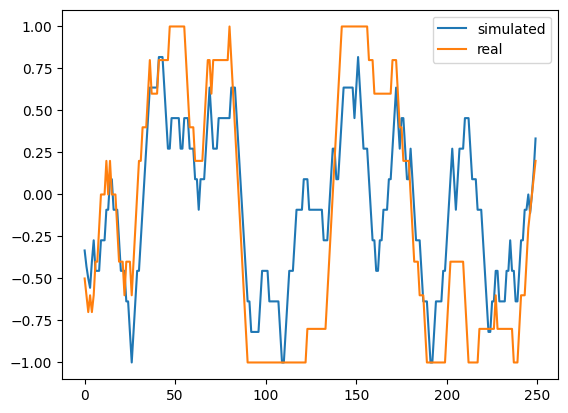

  3%|▎         | 1/29 [00:19<08:57, 19.18s/it]

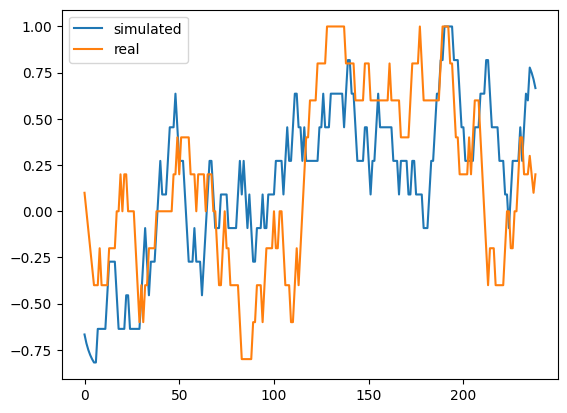

  7%|▋         | 2/29 [01:13<16:29, 36.66s/it]


KeyboardInterrupt: 

In [1]:
# get the relative value
from glob import glob
from os.path import join as pjoin
import numpy as np
import pandas as pd
import tqdm

from lib.models import RW

BEHAVIOUR_ROOT = 'data/behaviour_data/'
RELATIVE_VALUE_ROOT = 'data/relative_values/'

# load the behaviour data 
# add a progress bar
sessions = glob(pjoin(BEHAVIOUR_ROOT, '*.csv'))
for session in tqdm.tqdm(sessions):
    session_data = pd.read_csv(session)
    # remove nan trials
    session_data = session_data[~session_data['trial_response_side'].isna()]
    choices = session_data['trial_response_side'].values
    rewards = session_data['trial_reward'].values

    # fit the models
    rw = RW()
    parameters = rw.fit(choices_real=choices, rewards_real=rewards)[0]#

    # get the relative values
    relative_values = rw.get_delta_V(parameters, choices, rewards)
    # remove the last entry for the relative values
    relative_values = relative_values[:-1]

    # save the relative values
    session_name = session.split('/')[-1].split('.')[0]
    np.save(pjoin(RELATIVE_VALUE_ROOT, session_name+'.npy'), relative_values)


27it [00:04,  6.09it/s]/home/peiheng/anaconda3/envs/dissertation/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
28it [00:05,  6.52it/s]/home/peiheng/anaconda3/envs/dissertation/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
182it [00:31,  5.77it/s]
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

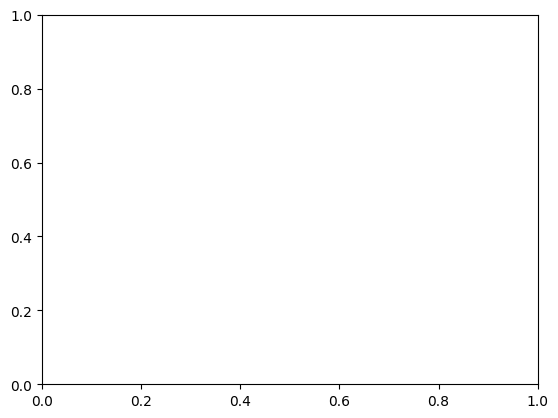

In [3]:
# creating poster panel C of figure 6 using mono pairs
from lib.figure_6 import figure_6_poster_panel_c
from os.path import join as pjoin
from glob import glob
from lib.file_utils import get_session_names, get_str_pfc
from lib.conversion import one_to_zero_cell

import tqdm
import pandas as pd
import numpy as np

# get all mono pairs
mono_pairs = pd.read_csv('mono_pairs.csv')

# plot figure 6 for each pair
# add a progress bar
pairs = mono_pairs.iterrows()

ps = []
rs = []

for i, row in tqdm.tqdm(pairs):
    session_name = str(row['mouse']) +  str(row['date'])
    session_data_path = pjoin('data', 'behaviour_data', session_name+'.csv')
    session_data = pd.read_csv(session_data_path)
    session_data.fillna(0, inplace=True)
    cue_times = session_data['cue_time'].values
    trial_reward = session_data['trial_reward'].values

    str_name = row['str_name']
    pfc_name = row['pfc_name']

    # change index from 1 based to 0 based
    str_name = one_to_zero_cell(str_name)
    pfc_name = one_to_zero_cell(pfc_name)

    str_times, pfc_times = np.load(pjoin('data', 'spike_times', session_name, str_name+'.npy')), np.load(pjoin('data', 'spike_times', session_name, pfc_name+'.npy'))
    cross_cors, reward_proportion, p, r = figure_6_poster_panel_c(str_times=str_times, pfc_times=pfc_times, cue_times=cue_times, rewarded=trial_reward, str_name=str_name, pfc_name=pfc_name, session_name=session_name, mono=True)
    ps.append(p)
    rs.append(r)

ps = np.array(ps)
rs = np.array(rs)

# find significant ps and rs
sig_ps = ps[ps<0.01]
sig_rs = rs[ps<0.01]

# transform positive values to 1 and negative values to 0
sig_rs = sig_rs>0

rs = rs>0

# plot the amount of negative and positive significant correlations
import matplotlib.pyplot as plt
plt.figure()
plt.hist(sig_rs)
plt.xlabel('Correlation coefficient')
plt.ylabel('Number of pairs')
plt.title('Distribution of significant correlations')

# plot the amount of negative and positive correlations
import matplotlib.pyplot as plt
plt.figure()
plt.hist(rs)
plt.xlabel('Correlation coefficient')
plt.ylabel('Number of pairs')
plt.title('Distribution of correlations')
